# Advanced ML


## Kernel Density Maps Visualization


Source: Python data science handbook

In [ ]:
#!conda install -c conda-forge cartopy

In [20]:
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids

In [21]:
data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')

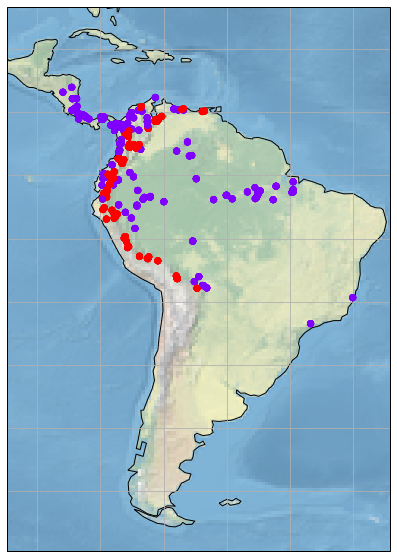

In [22]:
xgrid, ygrid = construct_grids(data)

fig = plt.figure(figsize=(7,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((xgrid.min(), xgrid.max(),ygrid.min(), ygrid.max()))
ax.stock_img()
ax.coastlines() 
ax.gridlines()

# Plot latlon data on the map.
ax.scatter(latlon[:, 1], latlon[:, 0], zorder=3,c=species, cmap='rainbow');
plt.show()

c:\apps\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


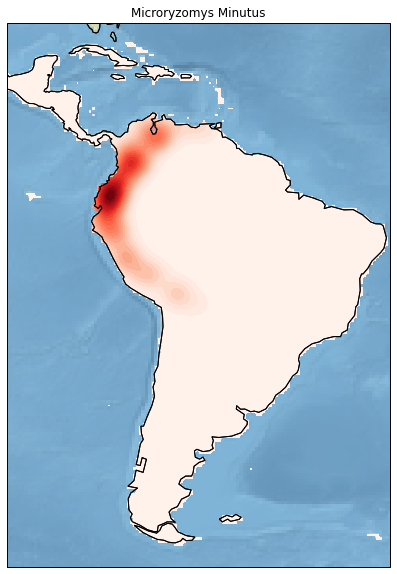

In [23]:
# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, axs = plt.subplots(1, 2, figsize = (7,10))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, ax in enumerate(axs):
    ax = plt.axes(projection=ccrs.PlateCarree())    
    ax.set_title(species_names[i])
    
    # plot coastlines with basemap
    ax.set_extent((xgrid.min(), xgrid.max(),ygrid.min(), ygrid.max()))
    ax.stock_img()
    ax.coastlines() 

    # construct a spherical kernel density estimate of the distribution
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    ax.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])